In [35]:
# This function will create PCA and plot the influence of PCA components on the variance

def PCA_test(dataset):
    
    ##### added line to ensure plots are showing
    %matplotlib inline
    #####

    import matplotlib.pyplot as plt
    from sklearn.decomposition import PCA
    from sklearn.preprocessing import normalize
    from pandas.plotting import scatter_matrix
    
    # First step is to normalize the dataset
    
    X = normalize(dataset)
    
    # Create an instance of PCA
    
    pca = PCA()
    
    # Fit normalized dataset "X" to new dataset X_PCA
    
    pca.fit(X)
    
    # Create PCA variables
    
    X_PCA = pca.transform(X)
    
    plt.plot(range(1,len(pca.components_)+1),pca.explained_variance_ratio_,'-o')
    plt.xlabel('components')
    plt.ylabel('% explained variance')
    plt.title("Scree plot")
    plt.show()
    
    return X_PCA, pca.explained_variance_ratio_
    

In [70]:

# Provide dataset and threshold % (0 - 1) and the function returns a PCA dataframe with the number of PC columns required to achieve
# the threshold

def select_PCA_Components(dataset, threshold):
    
    from sklearn.decomposition import PCA
    from sklearn.preprocessing import normalize
    from pandas.plotting import scatter_matrix
    
    pca_dataset = []
    total_per = 0
    
    # First step is to normalize the dataset
    
    X = normalize(dataset)
    
    # Create an instance of PCA
    
    pca = PCA()
    
    # Fit normalized dataset "X" to new dataset X_PCA
    
    pca.fit(X)
    
    # Create PCA variables
    
    x_pca = pca.transform(X)
    
    for i in range(0,x_pca.shape[1]):
        pca_dataset.append(x_pca[i])
        total_per = total_per + pca.explained_variance_ratio_[i]
        if total_per < threshold:
            continue
        else:
            return pd.DataFrame(pca_dataset).T
    return
                     
        
        

In [71]:
from sklearn import datasets
import pandas as pd
import numpy as np

data1 = datasets.load_breast_cancer() # Create dictionary from breast cancer dataset instance
data = pd.DataFrame(data1['data']) # Create dataframe of the observations ()"data" key) from dictionary
pca_data = select_PCA_Components(data, .95)

In [72]:
pca_data

,0,1,2
0,2.055198e-01,8.598651e-02,6.730691e-02
1,3.449107e-02,-3.156647e-02,-3.005880e-02
2,1.848642e-02,-6.107784e-03,8.570700e-03
3,-1.486153e-02,2.541581e-03,1.987290e-03
4,9.288606e-03,7.459507e-04,-1.136256e-03
5,3.795565e-03,-2.472465e-03,-2.420219e-03
6,7.619415e-04,-1.465392e-04,-3.717203e-04
7,-2.845560e-04,4.349800e-04,-1.651843e-04
8,-2.676751e-05,5.738975e-06,-1.637114e-04
9,5.249879e-04,-2.723108e-04,1.167138e-04


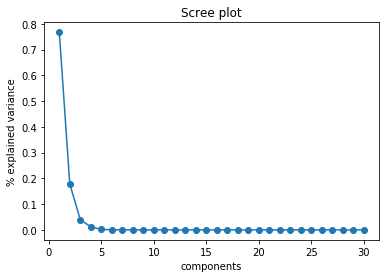

In [73]:
# Example of use enter dataframe of independant variables, return complete PCA

from sklearn import datasets
import pandas as pd
import numpy as np

data1 = datasets.load_breast_cancer() # Create dictionary from breast cancer dataset instance
data = pd.DataFrame(data1['data']) # Create dataframe of the observations ()"data" key) from dictionary
pca_variables, pca_comp_impact = PCA_test(data)

